In [3]:
import numpy as np
import matplotlib.pyplot as plt

Por cuestiones de tiempo, voy a hacer los ejercicios que sugirieron hacer en la práctica, y capaz alguno más

Ej 3

In [3]:
# Me creo la matriz asociada al sistema cuya solución es la solución aproximada con diferencias finitas

N = 8
alpha = 2

x_f = 10
t_f = 1

#como es tridiagonal, me creo los tres vectores de la diagonal, creo matrices con cada una, y después las sumo

vector_ceros = np.zeros(N - 1)
vect_alphas = (-1) * alpha * np.ones(N-1)

arr_1 = np.array([1])
arr_0 = np.array([0])

vector_1 = np.append(arr_1, vect_alphas)
diagonal = np.append(vector_1, arr_1)
print(diagonal)

#diagonal superior


diagonal_sup = np.append(arr_0, np.ones(N-1))
print(diagonal_sup)

diagonal_inf = np.append(np.ones(N-1), arr_0)
print(diagonal_inf)


matriz_diagonal = np.diag(diagonal)
matriz_diagonal_arriba =  np.diag(diagonal_sup, 1)
matriz_diagonal_abajo =  np.diag(diagonal_inf, -1)

M = matriz_diagonal + matriz_diagonal_arriba + matriz_diagonal_abajo

print('Matriz del sistema:')
print(M)

print('b:')

b = np.append(np.zeros(N), x_f)

print(b)

[ 1. -2. -2. -2. -2. -2. -2. -2.  1.]
[0. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 0.]
Matriz del sistema:
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]
b:
[ 0.  0.  0.  0.  0.  0.  0.  0. 10.]


In [4]:
#resuelvo el sistema

solución = np.linalg.solve(M,b)

x = solución
t = np.linspace(0, t_f, N+1)

In [29]:
x_f = 3
t_f = 1

t_0 = 0
x_0 = 0


def oscilador_armónico(m, k, h):
        
    N = int((t_f - t_0)/h)
    alpha = 2 - ((h**2)*k)/m

    vect_alphas = (-1) * alpha * np.ones(N-1)

    arr_1 = np.array([1])
    arr_0 = np.array([0])

    vector_1 = np.append(arr_1, vect_alphas)
    diagonal = np.append(vector_1, arr_1)

    diagonal_sup = np.append(arr_0, np.ones(N-1))
    diagonal_inf = np.append(np.ones(N-1), arr_0)

    matriz_diagonal = np.diag(diagonal)
    matriz_diagonal_arriba =  np.diag(diagonal_sup, 1)
    matriz_diagonal_abajo =  np.diag(diagonal_inf, -1)

    M = matriz_diagonal + matriz_diagonal_arriba + matriz_diagonal_abajo

    ceros = np.zeros(N-1)
    b = np.append(t_0, ceros)
    b = np.append(b, x_f)

    #resolvemos el sistema

    x = np.linalg.solve(M,b)
    t = np.linspace(0, t_f, N+1)

    return t, x



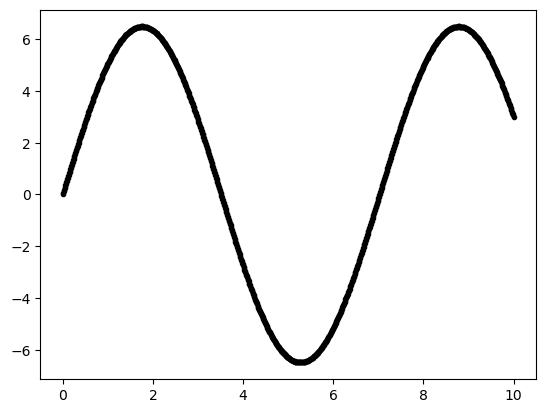

In [33]:
x_f = 3
t_f = 10

t_0 = 0
x_0 = 0

x, t = oscilador_armónico(m = 5, k = 4, h = 0.01)


plt.plot(x, t, ".k")

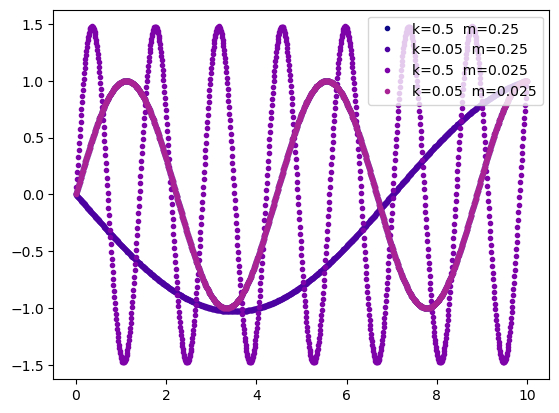

In [53]:
cmap = plt.cm.plasma #para los colores del gráfico

h = 0.01
x_f = 1
t_f = 10
t_0 = 0
x_0 = 0

contador = 0   #para que vaya cambiando el color
for m in [0.25, 0.025]:

  for k in [0.5, 0.05]:

    x, t = oscilador_armónico(m = m, k = k, h = h)

    color = cmap(contador/8)
    contador = contador + 1

    plt.plot(x ,t, '.', label='k={}'.format(k) + '  m={}'.format(m), color = color)

plt.xlabel('Tiempo')
plt.ylabel('Distancia')
plt.legend()
plt.show()
  

Vemos que en cuando el cociente entre k y m es el mismo, las soluciones son iguales (ya que la frecuencia es la misma)

Ej 7-8  
Sigo la base que pasaron los de la práctica

In [4]:
#Función para crear la matriz que nos sirve para iterar


def matriz_evolución_explícito(N, a, b, c):
    # N es el tamaño de la matriz (que suponemos cuadrada)
    # a es el número de la diagonal superior
    # b es el número de la diagonal
    # c es el número de la diagonal inferior

    vect_central = b * np.ones(N-1)

    arr_1 = np.array([1])
    arr_0 = np.array([0])

    vector_1 = np.append(arr_0, vect_central)
    diagonal = np.append(vector_1, arr_0)

    #diagonal superior
    diagonal_sup = np.append(arr_0, np.ones(N-1) * a)

    #diagonal inferior
    diagonal_inf = np.append(np.ones(N-1) * c, arr_0)

    matriz_diagonal = np.diag(diagonal)
    matriz_diagonal_superior =  np.diag(diagonal_sup, 1)
    matriz_diagonal_inferior =  np.diag(diagonal_inf, -1)

    M = matriz_diagonal + matriz_diagonal_superior + matriz_diagonal_inferior

    return M

#método explícito
r = 2
A = matriz_evolución_explícito(N = 7, a = r, b = 1-2*r, c = r)
print('método explícito:')
print(A)

def matriz_evolución_implícito(N, a, b, c):
    # N es el tamaño de la matriz (que suponemos cuadrada)
    # a es el número de la diagonal superior
    # b es el número de la diagonal
    # c es el número de la diagonal inferior

    vect_central = b * np.ones(N-1)

    arr_1 = np.array([1])
    arr_0 = np.array([0])

    vector_1 = np.append(arr_1, vect_central)
    diagonal = np.append(vector_1, arr_1)

    #diagonal superior
    diagonal_sup = np.append(arr_0, np.ones(N-1) * a)

    #diagonal inferior
    diagonal_inf = np.append(np.ones(N-1) * c, arr_0)

    matriz_diagonal = np.diag(diagonal)
    matriz_diagonal_superior =  np.diag(diagonal_sup, 1)
    matriz_diagonal_inferior =  np.diag(diagonal_inf, -1)

    M = matriz_diagonal + matriz_diagonal_superior + matriz_diagonal_inferior

    return M

#método impícito
r = 2
A = matriz_evolución_implícito(N = 7, a = -r, b = 1+2*r, c = -r)
print('método implícito:')
print(A)

método explícito:
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2. -3.  2.  0.  0.  0.  0.  0.]
 [ 0.  2. -3.  2.  0.  0.  0.  0.]
 [ 0.  0.  2. -3.  2.  0.  0.  0.]
 [ 0.  0.  0.  2. -3.  2.  0.  0.]
 [ 0.  0.  0.  0.  2. -3.  2.  0.]
 [ 0.  0.  0.  0.  0.  2. -3.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
método implícito:
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [-2.  5. -2.  0.  0.  0.  0.  0.]
 [ 0. -2.  5. -2.  0.  0.  0.  0.]
 [ 0.  0. -2.  5. -2.  0.  0.  0.]
 [ 0.  0.  0. -2.  5. -2.  0.  0.]
 [ 0.  0.  0.  0. -2.  5. -2.  0.]
 [ 0.  0.  0.  0.  0. -2.  5. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


In [6]:

#primero dados dx y dt, discretizamos los intervalos
x0 = 0
xf = 1
t0 = 0
tf = 1

dx = 0.1
dt = 0.1

N = int(round((xf-x0)/dx)) #pasos en x

M = int(round((tf-t0)/dt)) #pasos en t

r = dt/(dx)**2 # (alpha = 0)
A = matriz_evolución_explícito(N = N, a = r, b = 1-2*r, c = r)


u_t0 = np.array([3,2,1,1,1,1,2,3]) # vector de temperaturas iniciales, de largo N + 1 ( en el ej lo llaman g)

u_t0 = 0.2 * np.ones(N + 1) # pruebo con este, que empieza con temperatura cte 0.2, Obs: en los bordes tiene que coincidir con los elementos
# de los bordes... ah no porque la matriz la lo anula! O sea los bordes no van a aportar, pero bueno, así puedo ponerle una forma funcional
# al perfil de temperaturas inicial sin preocuparme de que coincida en los bordes


#necesitamos tambien los vectores de los bordes, voy a hacer que sean ctes
u_xo = 0
u_xo = u_xo * np.ones(M+1)

u_xf = 0
u_xf = u_xf * np.ones(M+1)


#creamos una lista que vaya guardando el u(x), para cada t (cada elemento de la lista es un array)
u_xt = []
u_xt.append(u_t0)

#método discreto, tenemos que iterar (no resolver un sist lineal en cada paso)

u_t = u_t0

for i in range(0,M):
    #vector de los bordes
    u_xo_t_sig = u_xo[i + 1]
    u_xf_t_sig = u_xf[i + 1]
    bordes = np.append(u_xo_t_sig, np.zeros(N - 1))
    bordes = np.append(bordes, u_xf_t_sig)

    #doy el paso al tiempo t + dt
    u_t_sig = np.dot(A, u_t) + bordes
    
    #lo guardo en la lista
    u_xt.append(u_t_sig)

    u_t = u_t_sig



La funcuón asume `u_xo` y `u_xf` ctes  
Se podría modificar fácilmente, pidiendo los arrays de cada extremo para cada t y listo, pero el ej pide que sea cte, así tmb se vé cómo llega al equilibrio

In [5]:

def Ec_calor_explícito(dx, dt, alpha, u_t0, t0, tf, x0, xf, u_xo, u_xf):

    N = int(round((xf-x0)/dx)) #pasos en x

    M = int(round((tf-t0)/dt)) #pasos en t

    r = (dt/(dx)**2) * alpha
    A = matriz_evolución_explícito(N = N, a = r, b = 1-2*r, c = r)

    u_t0 = u_t0*np.ones(N+1)

    u_xo = u_xo * np.ones(M+1)
    u_xf = u_xf * np.ones(M+1)

    #creamos una lista que vaya guardando el u(x), para cada t (cada elemento de la lista es un array)
    u_xt = []

    #método discreto, tenemos que iterar (no resolver un sist lineal en cada paso)

    u_t = u_t0

    for i in range(-1,M):
        #vector de los bordes
        u_xo_t_sig = u_xo[i + 1]
        u_xf_t_sig = u_xf[i + 1]
        bordes = np.append(u_xo_t_sig, np.zeros(N - 1))
        bordes = np.append(bordes, u_xf_t_sig)

        #doy el paso al tiempo t + dt
        u_t_sig = np.dot(A, u_t) + bordes
        
        #lo guardo en la lista
        u_xt.append(u_t_sig)

        u_t = u_t_sig


    tiempos = np.linspace(t0, tf, M+1)
    posiciones =  np.linspace(x0, xf, N+1)

    return tiempos, posiciones, u_xt

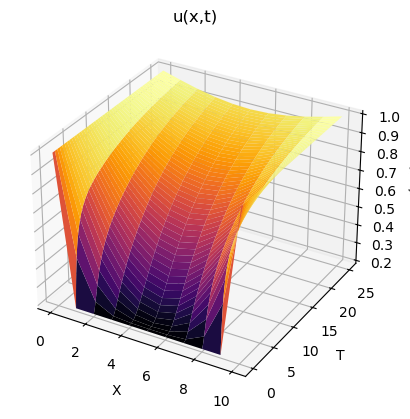

In [142]:
t, x, u_xt = Ec_calor_explícito(dx = 1, dt = 0.01, alpha = 1, u_t0 = 0.2, t0 = 0, tf = 25, x0 = 0, xf = 10, u_xo = 1, u_xf = 1)

#(esto se lo pedí a chatgpt)
# Crear la malla de (X, T) usando np.meshgrid
X, T = np.meshgrid(x, t)

# Convertir u_xt en un array 2D para que coincida con la malla
U = np.array(u_xt)  # u_xt es una lista de 1D, ahora la convertimos en una matriz 2D

# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(X, T, U, cmap='inferno')

# Etiquetas
ax.set_xlabel('X')
ax.set_ylabel('T')
ax.set_zlabel('u(x,t)')
ax.set_title('u(x,t)')

# Mostrar el gráfico
plt.show()


In [139]:

t, x, u_xt = Ec_calor_explícito(dx = 1, dt = 0.01, alpha = 1, u_t0 = 0.2, t0 = 0, tf = 15, x0 = 0, xf = 10, u_xo = 1, u_xf = 1)

print(u_xt[-1])

print(len(t))
print(len(x))

print(len(u_xt))
print(len(u_xt[1]))

[1.         0.92815324 0.86334009 0.81190504 0.77888232 0.76750359
 0.77888232 0.81190504 0.86334009 0.92815324 1.        ]
1501
11
1501
11


Veo qué pasa si la condición de estabilidad no se cumple (o sea r no es menor que 1/2)

In [145]:
t, x, u_xt = Ec_calor_explícito(dx = 0.01, dt = 0.01, alpha = 1, u_t0 = 0.2, t0 = 0, tf = 15, x0 = 0, xf = 10, u_xo = 1, u_xf = 1)

print(u_xt[1])
print(u_xt[50])
print(u_xt[-1])

[ 1.  80.2  0.2 ...  0.2 80.2  1. ]
[ 1.00000000e+000 -1.39114323e+127  2.62217526e+127 ...  2.62217526e+127
 -1.39114323e+127  1.00000000e+000]
[nan nan nan ... nan nan nan]


Lo que pasa es que todo diverge y crece tanto que dan nans (por qué no darán infs?)  

Veo si puedo graficar la "película" de la evolución de u(x)

In [18]:
t, x, u_xt = Ec_calor_explícito(dx = 1, dt = 0.01, alpha = 1, u_t0 = 0.2, t0 = 0, tf = 25, x0 = 0, xf = 10, u_xo = 1, u_xf = 1)

import matplotlib
matplotlib.use('TkAgg')  # O también puedes usar 'Qt5Agg'

plt.ion()  # Activar el modo interactivo
fig, ax = plt.subplots()

# Inicializa la primera gráfica
line, = ax.plot(x, u_xt[0])  # La coma asegura que "line" sea un objeto Line2D, no una lista

# La animación
for i in range(1, len(u_xt), 50):  # Cambié el paso a 50 para que sea menos denso
    line.set_ydata(u_xt[i])  # Actualiza los datos de la línea con el siguiente paso de tiempo
    
    fig.canvas.draw()         # Refresca el gráfico
    fig.canvas.flush_events() # Asegura que los eventos de la figura se actualicen
    plt.pause(0.1)            # Pausa para que se vea el cuadro

plt.ioff()  # Desactiva el modo interactivo después de la animación
plt.show()  # Muestra la última imagen cuando termine

In [ ]:
t, x, u_xt = Ec_calor_explícito(dx = 1, dt = 0.01, alpha = 1, u_t0 = 0.2, t0 = 0, tf = 25, x0 = 0, xf = 10, u_xo = 1, u_xf = 1)


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # Para mostrar la animación en la celda
import numpy as np

# Crear la figura y el eje
fig, ax = plt.subplots()

# Inicializa la línea
line, = ax.plot(x, u_xt[0], "-r")
ax.set_xlabel('x')
ax.set_ylabel('Temperatura')


# Función de actualización para la animación
def update(i):
    line.set_ydata(u_xt[i])  # Actualiza los datos de la línea
    return line,

# Crear la animación con FuncAnimation
ani = FuncAnimation(fig, update, frames=range(0, len(u_xt), 50), interval=100, blit=True)

# Mostrar la animación como HTML dentro de la celda
HTML(ani.to_jshtml())  # Esto incrusta la animación en la celda del notebook

Me gustaría ver si los puedo poner más lindos

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

t, x, u_xt = Ec_calor_explícito(dx = 0.1, dt = 0.001, alpha = 1, u_t0 = 0.2, t0 = 0, tf = 25, x0 = 0, xf = 10, u_xo = 1, u_xf = 1)

# Crear la figura y el eje
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('Temperatura')

u_xt = np.array(u_xt)
# Primer frame: scatter coloreado
sc = ax.scatter(x, u_xt[0], c=u_xt[0], cmap='inferno', s=30, vmin=u_xt.min(), vmax=u_xt.max())

# Barra de color opcional
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Temperatura")

# Función de actualización
def update(i):
    sc.set_offsets(np.c_[x, u_xt[i]])    # Actualiza posiciones
    sc.set_array(u_xt[i])                # Actualiza colores
    return sc,

# Crear la animación
ani = FuncAnimation(fig, update, frames=range(0, len(u_xt), 50), interval=50, blit=True)

# Mostrar la animación
HTML(ani.to_jshtml())